<a href="https://colab.research.google.com/github/swastikbanerjee/ADT_project/blob/main/2348566_ESE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Swastik Banerjee 2348566

#Q1

1. Image preprocessing

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

img = cv2.imread('/content/Set-3-q1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

1.i.a.Sobel Method

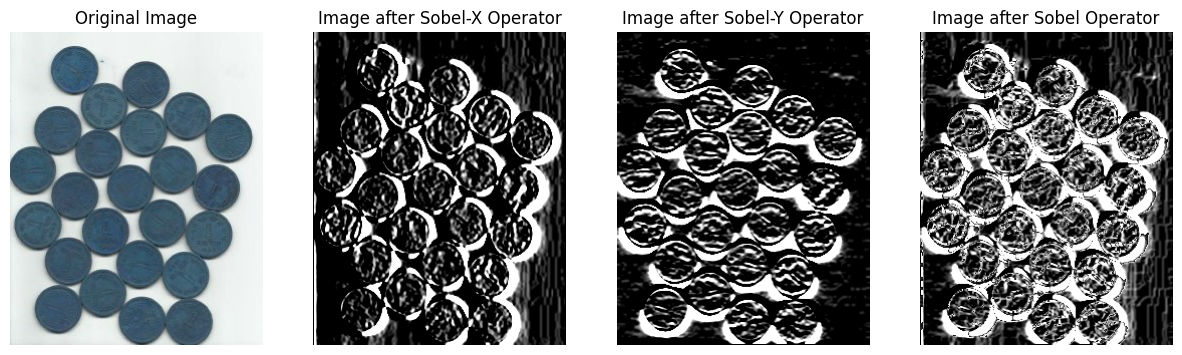

In [ ]:
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title("Original Image")
plt.imshow(img,"gray")
plt.axis("off")
plt.subplot(1,4,2)
plt.title("Image after Sobel-X Operator")
plt.imshow(img_sobelx,"gray")
plt.axis("off")
plt.subplot(1,4,3)
plt.title("Image after Sobel-Y Operator")
plt.imshow(img_sobely,"gray")
plt.axis("off")
plt.subplot(1,4,4)
plt.title("Image after Sobel Operator")
plt.imshow(img_sobel,"gray")
plt.axis("off")
plt.show()

1.i.b.Prewitt Method

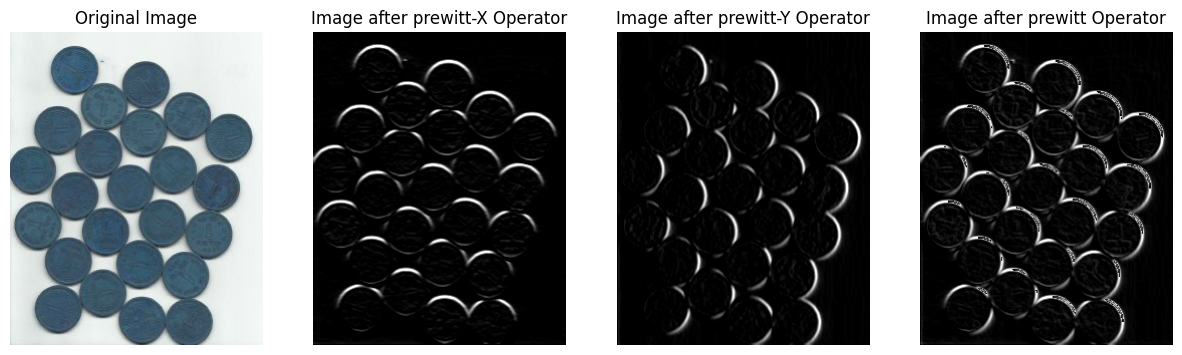

In [ ]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
img_prewitt = img_prewittx + img_prewitty
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title("Original Image")
plt.imshow(img,"gray")
plt.axis("off")
plt.subplot(1,4,2)
plt.title("Image after prewitt-X Operator")
plt.imshow(img_prewittx,"gray")
plt.axis("off")
plt.subplot(1,4,3)
plt.title("Image after prewitt-Y Operator")
plt.imshow(img_prewitty,"gray")
plt.axis("off")
plt.subplot(1,4,4)
plt.title("Image after prewitt Operator")
plt.imshow(img_prewitt,"gray")
plt.axis("off")
plt.show()

1.i.c.Robert Method

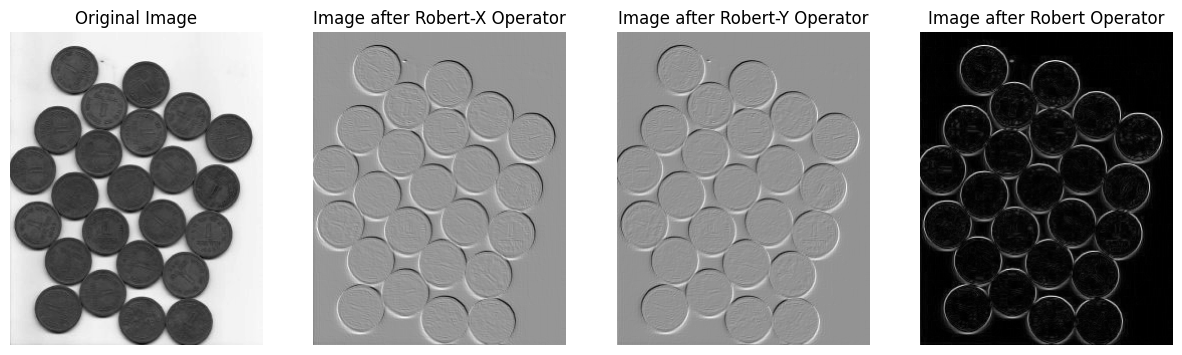

In [ ]:
roberts_cross_v = np.array( [[1, 0 ],
							[0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 1 ],
							[ -1, 0 ]] )
img = cv2.imread("/content/Set-3-q1.jpg",0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title("Original Image")
plt.imshow(img,"gray")
plt.axis("off")
plt.subplot(1,4,2)
plt.title("Image after Robert-X Operator")
plt.imshow(horizontal,"gray")
plt.axis("off")
plt.subplot(1,4,3)
plt.title("Image after Robert-Y Operator")
plt.imshow(vertical,"gray")
plt.axis("off")
plt.subplot(1,4,4)
plt.title("Image after Robert Operator")
plt.imshow(edged_img,"gray")
plt.axis("off")
plt.show()

1.ii. Interpretation of the Results

Sobel Operator:
- **Interpretation**: Sobel highlights edges by emphasizing regions with significant intensity changes both horizontally and vertically.
- **Edge Detection**: High gradient magnitudes indicate strong edges, making it effective for edge detection.

Prewitt Operator:
- **Interpretation**: Similar to Sobel, Prewitt detects edges by emphasizing areas with notable intensity changes in both horizontal and vertical directions.
- **Edge Detection**: It identifies edges through high gradient magnitudes in both directions.

Roberts Cross Operator:
- **Interpretation**: Roberts detects edges using diagonal intensity changes.
- **Edge Detection**: It highlights edges by focusing on the magnitude of gradient changes along diagonals, albeit potentially less robust to noise compared to Sobel and Prewitt.

In all methods, the gradient magnitude signifies rapid intensity changes, which are indicative of edges. Thresholding this magnitude helps in edge detection.

#Q2

2. Image Preprocessing

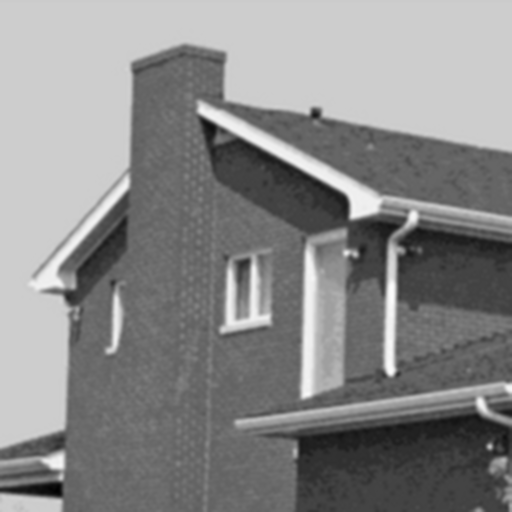

In [ ]:
import cv2
import numpy as np

image = cv2.imread('/content/set-3-q2.tif')
#Grayscale Conversion
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#Image Resizing
new_width, new_height = 300, 200
resized_image = cv2.resize(gray_image, (new_width, new_height))
#Image Smoothing
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
cv2_imshow(blurred_image)

2.i. Image Texture Feature Extraction

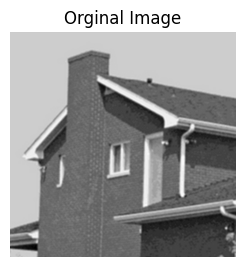

Texture Feature Extracted Image:


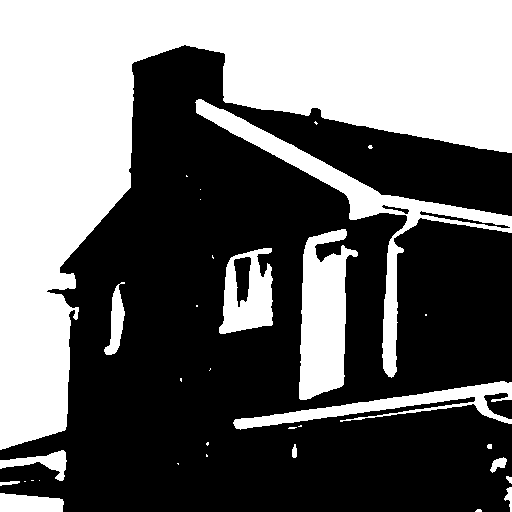

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_og = cv2.imread('/content/set-3-q2.tif')
image = cv2.imread('/content/set-3-q2.tif', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.title("Orginal Image")
plt.imshow(image_og)
plt.axis('off')
plt.show()
_, texture_mask = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)
print("Texture Feature Extracted Image:")
cv2_imshow(texture_mask)

2.ii & iii. Horizontal, Vertical, +45 degree, -45 degree line extraction

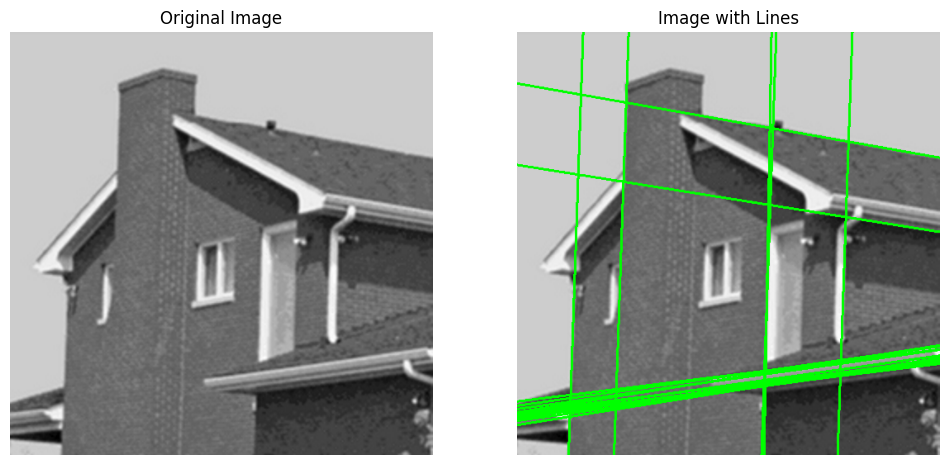

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('/content/set-3-q2.tif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(gray, low_threshold, high_threshold)
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=100)
def draw_lines(img, lines):
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
def filter_lines(lines, angle_range):
    filtered_lines = []
    for line in lines:
        rho, theta = line[0]
        angle = np.degrees(theta)
        if angle_range[0] <= angle <= angle_range[1]:
            filtered_lines.append(line)
    return filtered_lines
horizontal_lines = filter_lines(lines, (0, 10))
vertical_lines = filter_lines(lines, (80, 100))
pos_45deg_lines = filter_lines(lines, (45, 55))
neg_45deg_lines = filter_lines(lines, (125, 135))
img_with_lines = np.copy(img)
draw_lines(img_with_lines, horizontal_lines)
draw_lines(img_with_lines, vertical_lines)
draw_lines(img_with_lines, pos_45deg_lines)
draw_lines(img_with_lines, neg_45deg_lines)

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Image with Lines'), plt.axis('off')
plt.show()